In [1]:
#Mid bootcamp project

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
import warnings
import math
from scipy.special import inv_boxcox
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('../data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [69]:
data=data.set_index('Name')

In [70]:
#First sight at the data
data.describe()

,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17118.000000,17118.000000,17067.000000,17125.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.602273,62.924847,64.715591,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.443605,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,13.960635,17.729483,76.809344,18.047250,18.188344,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.372443,9.037279,14.031563,49.380576,13.417931,11.918063,15.313272,12.627212,19.044862,62.913935,17.021619,20.846705,19.094432,13.730080,15.696363,11.751111,61.595180,20.182548,21.483597,21.185154,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,51.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,67.000000,53.000000,269.000000,60.000000,53.000000,57.000000,57.000000,51.000000,61.000000,158.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.00000

In [71]:
#Checking for NANs
data.isna().sum()

Age             0
OVA             0
Nationality     0
Club           23
BOV             0
               ..
CB              0
RCB             0
RB              0
GK              0
Gender          0
Length: 105, dtype: int64

In [72]:
#Checking for null values
set(data.columns[np.sum(data.isna())/data.shape[0] > .25])

{'Loan Date End'}

In [73]:
#Checking for the columns with no nulls
set(data.columns[np.sum(data.isna())==0])

{'Acceleration',
 'Age',
 'Aggression',
 'Attacking',
 'BOV',
 'BP',
 'Ball Control',
 'Base Stats',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'Contract',
 'Crossing',
 'DEF',
 'DRI',
 'Defending',
 'Dribbling',
 'FK Accuracy',
 'Finishing',
 'Flag Photo',
 'GK',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Gender',
 'Goalkeeping',
 'Growth',
 'Heading Accuracy',
 'Height',
 'Hits',
 'IR',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Long Passing',
 'Long Shots',
 'Marking',
 'Mentality',
 'Movement',
 'Nationality',
 'OVA',
 'PAC',
 'PAS',
 'PHY',
 'POT',
 'Penalties',
 'Player Photo',
 'Power',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'Reactions',
 'Release Clause',
 'SHO',
 'SM',
 'ST',
 'Short Passing',
 'Shot Power',
 'Skill',
 'Sprint Speed',
 'Stamina',
 'Standing Tackle',
 'Strength',
 'Team & Contract',
 'Total Stats',
 'Value',
 'W/F',
 'Wage',
 'Weight',
 'foot'}

In [75]:
#Dropping not usefull columns
clean_data=data[['Age','Club', 'OVA', 'Nationality', 'BP', 'Wage', 'Value', 'Contract', 'PAC', 'SHO', 'PAS','DRI', 'PHY', 'DEF' ]]
clean_data

,Age,Club,OVA,Nationality,BP,Wage,Value,Contract,PAC,SHO,PAS,DRI,PHY,DEF
Name,,,,,,,,,,,,,,
G. Pasquale,33,Udinese,69,Italy,LWB,€7K,€625K,2008 ~ 2016,71,59,70,71,69,68
Luis García,37,KAS Eupen,71,Spain,CM,€7K,€600K,2014 ~ 2019,53,69,73,69,63,58
J. Cole,33,Coventry City,71,England,CAM,€15K,€1.1M,2016 ~ 2020,45,68,76,77,52,36
D. Yorke,36,Sunderland,68,Trinidad &amp; Tobago,ST,€0,€0,2009,61,66,66,69,60,47
Iniesta,36,Vissel Kobe,81,Spain,CAM,€12K,€5.5M,2018 ~ 2021,58,70,85,85,59,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A. Medioub,22,CD Tondela,64,France,CB,€2K,€550K,"Jun 30, 2021 On Loan",54,30,37,48,69,64
W. Rickard,18,Burnley,56,Wales,CAM,€3K,€130K,2020 ~ 2021,62,46,57,56,55,43
C. Barrett,18,Burnley,56,England,RB,€2K,€130K,2020 ~ 2022,63,35,44,52,55,54


In [76]:
clean_data[clean_data['Contract'].isna()==True]

,Age,Club,OVA,Nationality,BP,Wage,Value,Contract,PAC,SHO,PAS,DRI,PHY,DEF
Name,,,,,,,,,,,,,,


In [77]:
# new data frame with split value columns 
split=clean_data["Contract"].str.split("~", n=1, expand=True)
  
# making separate first name column from new data frame 
clean_data["Start"]= split[0] 
  
# making separate last name column from new data frame 
clean_data["End"]= split[1] 

clean_data.drop(columns=["Contract"])
  
# df display 
split

,0,1
Name,,
G. Pasquale,2008,2016
Luis García,2014,2019
J. Cole,2016,2020
D. Yorke,2009,None
Iniesta,2018,2021
...,...,...
A. Medioub,"Jun 30, 2021 On Loan",None
W. Rickard,2020,2021
C. Barrett,2020,2022


In [78]:
clean_data['End']=pd.to_numeric(clean_data['End'])

In [79]:
clean_data.dtypes 

Age              int64
Club            object
OVA              int64
Nationality     object
BP              object
Wage            object
Value           object
Contract        object
PAC              int64
SHO              int64
PAS              int64
DRI              int64
PHY              int64
DEF              int64
Start           object
End            float64
dtype: object

In [80]:
active_players=clean_data[clean_data['End']>=2021]
active_players

,Age,Club,OVA,Nationality,BP,Wage,Value,Contract,PAC,SHO,PAS,DRI,PHY,DEF,Start,End
Name,,,,,,,,,,,,,,,,
Iniesta,36,Vissel Kobe,81,Spain,CAM,€12K,€5.5M,2018 ~ 2021,58,70,85,85,59,63,2018,2021.0
R. Keane,35,LA Galaxy,80,Republic of Ireland,CF,€10K,€5.5M,2011 ~ 2022,68,82,75,82,69,31,2011,2022.0
G. Buffon,42,Juventus,82,Italy,GK,€41K,€2.2M,2019 ~ 2021,77,76,74,78,91,33,2019,2021.0
M. Stekelenburg,37,Ajax,72,Netherlands,GK,€5K,€325K,2020 ~ 2021,69,71,72,70,73,33,2020,2021.0
K. Ellison,41,Newport County,58,England,ST,€2K,€0,2020 ~ 2021,43,63,56,63,72,43,2020,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F. Tapia,19,Club América,60,Mexico,GK,€2K,€300K,2020 ~ 2022,60,61,60,65,59,24,2020,2022.0
W. Rickard,18,Burnley,56,Wales,CAM,€3K,€130K,2020 ~ 2021,62,46,57,56,55,43,2020,2021.0
C. Barrett,18,Burnley,56,England,RB,€2K,€130K,2020 ~ 2022,63,35,44,52,55,54,2020,2022.0


In [81]:
active_players['Wage'] = active_players['Wage'].str.replace('€', '')
active_players['Value'] = active_players['Value'].str.replace('€', '')
active_players[['Wage', 'Value']]

,Wage,Value
Name,,
Iniesta,12K,5.5M
R. Keane,10K,5.5M
G. Buffon,41K,2.2M
M. Stekelenburg,5K,325K
K. Ellison,2K,0
...,...,...
F. Tapia,2K,300K
W. Rickard,3K,130K
C. Barrett,2K,130K


In [82]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0

active_players['Wage'] = active_players['Wage'].apply(value_to_float)
active_players['Value'] = active_players['Value'].apply(value_to_float)


In [83]:
active_players[['Wage', 'Value']]

,Wage,Value
Name,,
Iniesta,12000.0,5500000.0
R. Keane,10000.0,5500000.0
G. Buffon,41000.0,2200000.0
M. Stekelenburg,5000.0,325000.0
K. Ellison,2000.0,NaN
...,...,...
F. Tapia,2000.0,300000.0
W. Rickard,3000.0,130000.0
C. Barrett,2000.0,130000.0


In [84]:
set(active_players.columns[np.sum(active_players.isnull()) != 0]) #Provide a set of columns with 0 missing values.

{'Value', 'Wage'}

In [85]:
active_players.dropna(inplace=True)
active_players

,Age,Club,OVA,Nationality,BP,Wage,Value,Contract,PAC,SHO,PAS,DRI,PHY,DEF,Start,End
Name,,,,,,,,,,,,,,,,
Iniesta,36,Vissel Kobe,81,Spain,CAM,12000.0,5500000.0,2018 ~ 2021,58,70,85,85,59,63,2018,2021.0
R. Keane,35,LA Galaxy,80,Republic of Ireland,CF,10000.0,5500000.0,2011 ~ 2022,68,82,75,82,69,31,2011,2022.0
G. Buffon,42,Juventus,82,Italy,GK,41000.0,2200000.0,2019 ~ 2021,77,76,74,78,91,33,2019,2021.0
M. Stekelenburg,37,Ajax,72,Netherlands,GK,5000.0,325000.0,2020 ~ 2021,69,71,72,70,73,33,2020,2021.0
Tarantini,36,Rio Ave FC,72,Portugal,CM,6000.0,975000.0,2008 ~ 2021,50,67,71,70,67,70,2008,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F. Tapia,19,Club América,60,Mexico,GK,2000.0,300000.0,2020 ~ 2022,60,61,60,65,59,24,2020,2022.0
W. Rickard,18,Burnley,56,Wales,CAM,3000.0,130000.0,2020 ~ 2021,62,46,57,56,55,43,2020,2021.0
C. Barrett,18,Burnley,56,England,RB,2000.0,130000.0,2020 ~ 2022,63,35,44,52,55,54,2020,2022.0


In [86]:
active_players.drop(columns=['Start', 'Contract'], inplace=True)

In [87]:
active_players[active_players['BP']=='CDM'].head()

,Age,Club,OVA,Nationality,BP,Wage,Value,PAC,SHO,PAS,DRI,PHY,DEF,End
Name,,,,,,,,,,,,,,
R. Ziegler,34,FC Dallas,69,Switzerland,CDM,4000.0,400000.0,55,63,72,66,71,70,2021.0
J. Jones,35,LA Galaxy,73,United States,CDM,6000.0,950000.0,65,68,70,69,84,69,2022.0
J. Makoun,33,Antalyaspor,69,Cameroon,CDM,9000.0,450000.0,65,56,65,65,67,67,2023.0
M. Topal,34,Medipol Başakşehir FK,74,Turkey,CDM,28000.0,2200000.0,54,64,62,67,73,76,2021.0
A. Hutchinson,37,Beşiktaş JK,76,Canada,CDM,37000.0,1700000.0,64,64,73,71,77,75,2021.0


In [88]:
active_players.describe().round()

,Age,OVA,Wage,Value,PAC,SHO,PAS,DRI,PHY,DEF,End
count,11141.0,11141.0,11141.0,11141.0,11141.0,11141.0,11141.0,11141.0,11141.0,11141.0,11141.0
mean,25.0,68.0,13497.0,3283896.0,69.0,56.0,60.0,65.0,66.0,52.0,2022.0
std,4.0,6.0,24242.0,6325928.0,11.0,14.0,10.0,10.0,9.0,17.0,1.0
min,16.0,47.0,1000.0,15000.0,28.0,16.0,25.0,28.0,28.0,15.0,2021.0
25%,22.0,64.0,2000.0,525000.0,63.0,47.0,54.0,60.0,60.0,36.0,2021.0
50%,25.0,68.0,5000.0,1000000.0,70.0,59.0,61.0,66.0,67.0,55.0,2022.0
75%,28.0,72.0,15000.0,3300000.0,76.0,66.0,67.0,72.0,73.0,65.0,2023.0
max,42.0,93.0,560000.0,105500000.0,96.0,93.0,93.0,95.0,91.0,91.0,2028.0


In [89]:
active_players.dtypes

Age              int64
Club            object
OVA              int64
Nationality     object
BP              object
Wage           float64
Value          float64
PAC              int64
SHO              int64
PAS              int64
DRI              int64
PHY              int64
DEF              int64
End            float64
dtype: object

In [90]:
ap_nums=active_players.select_dtypes(np.number)

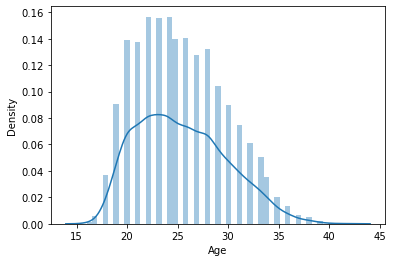

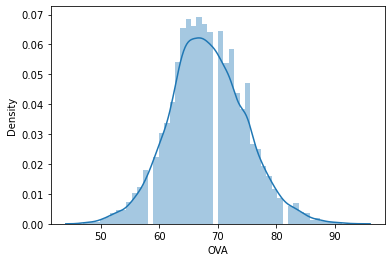

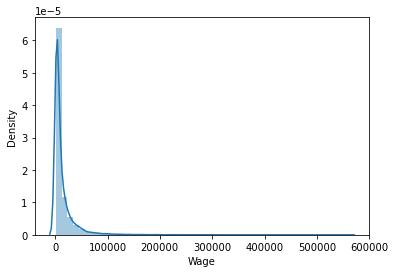

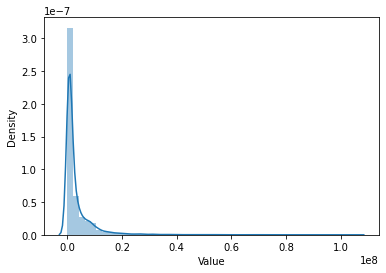

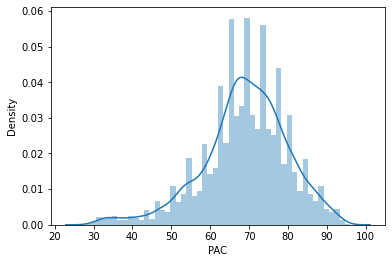

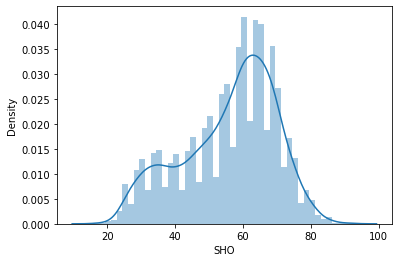

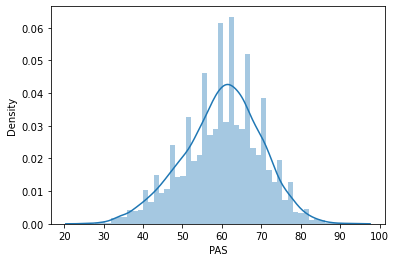

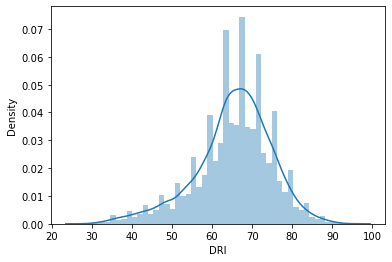

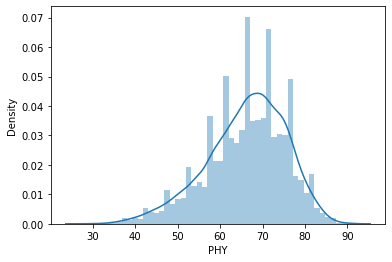

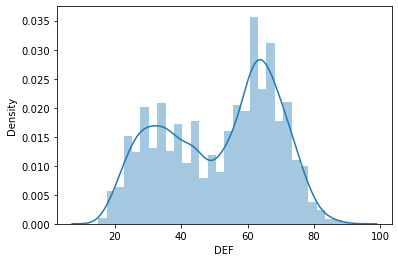

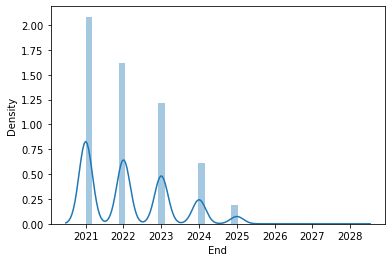

In [25]:
for column in ap_nums.select_dtypes(np.number).columns:
    sns.distplot(ap_nums[column])
    plt.show()

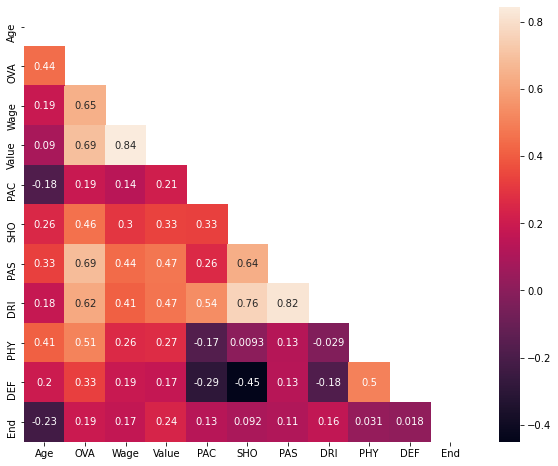

In [26]:
mask = np.zeros_like(active_players.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(active_players.corr(), mask=mask, annot=True)
plt.show()


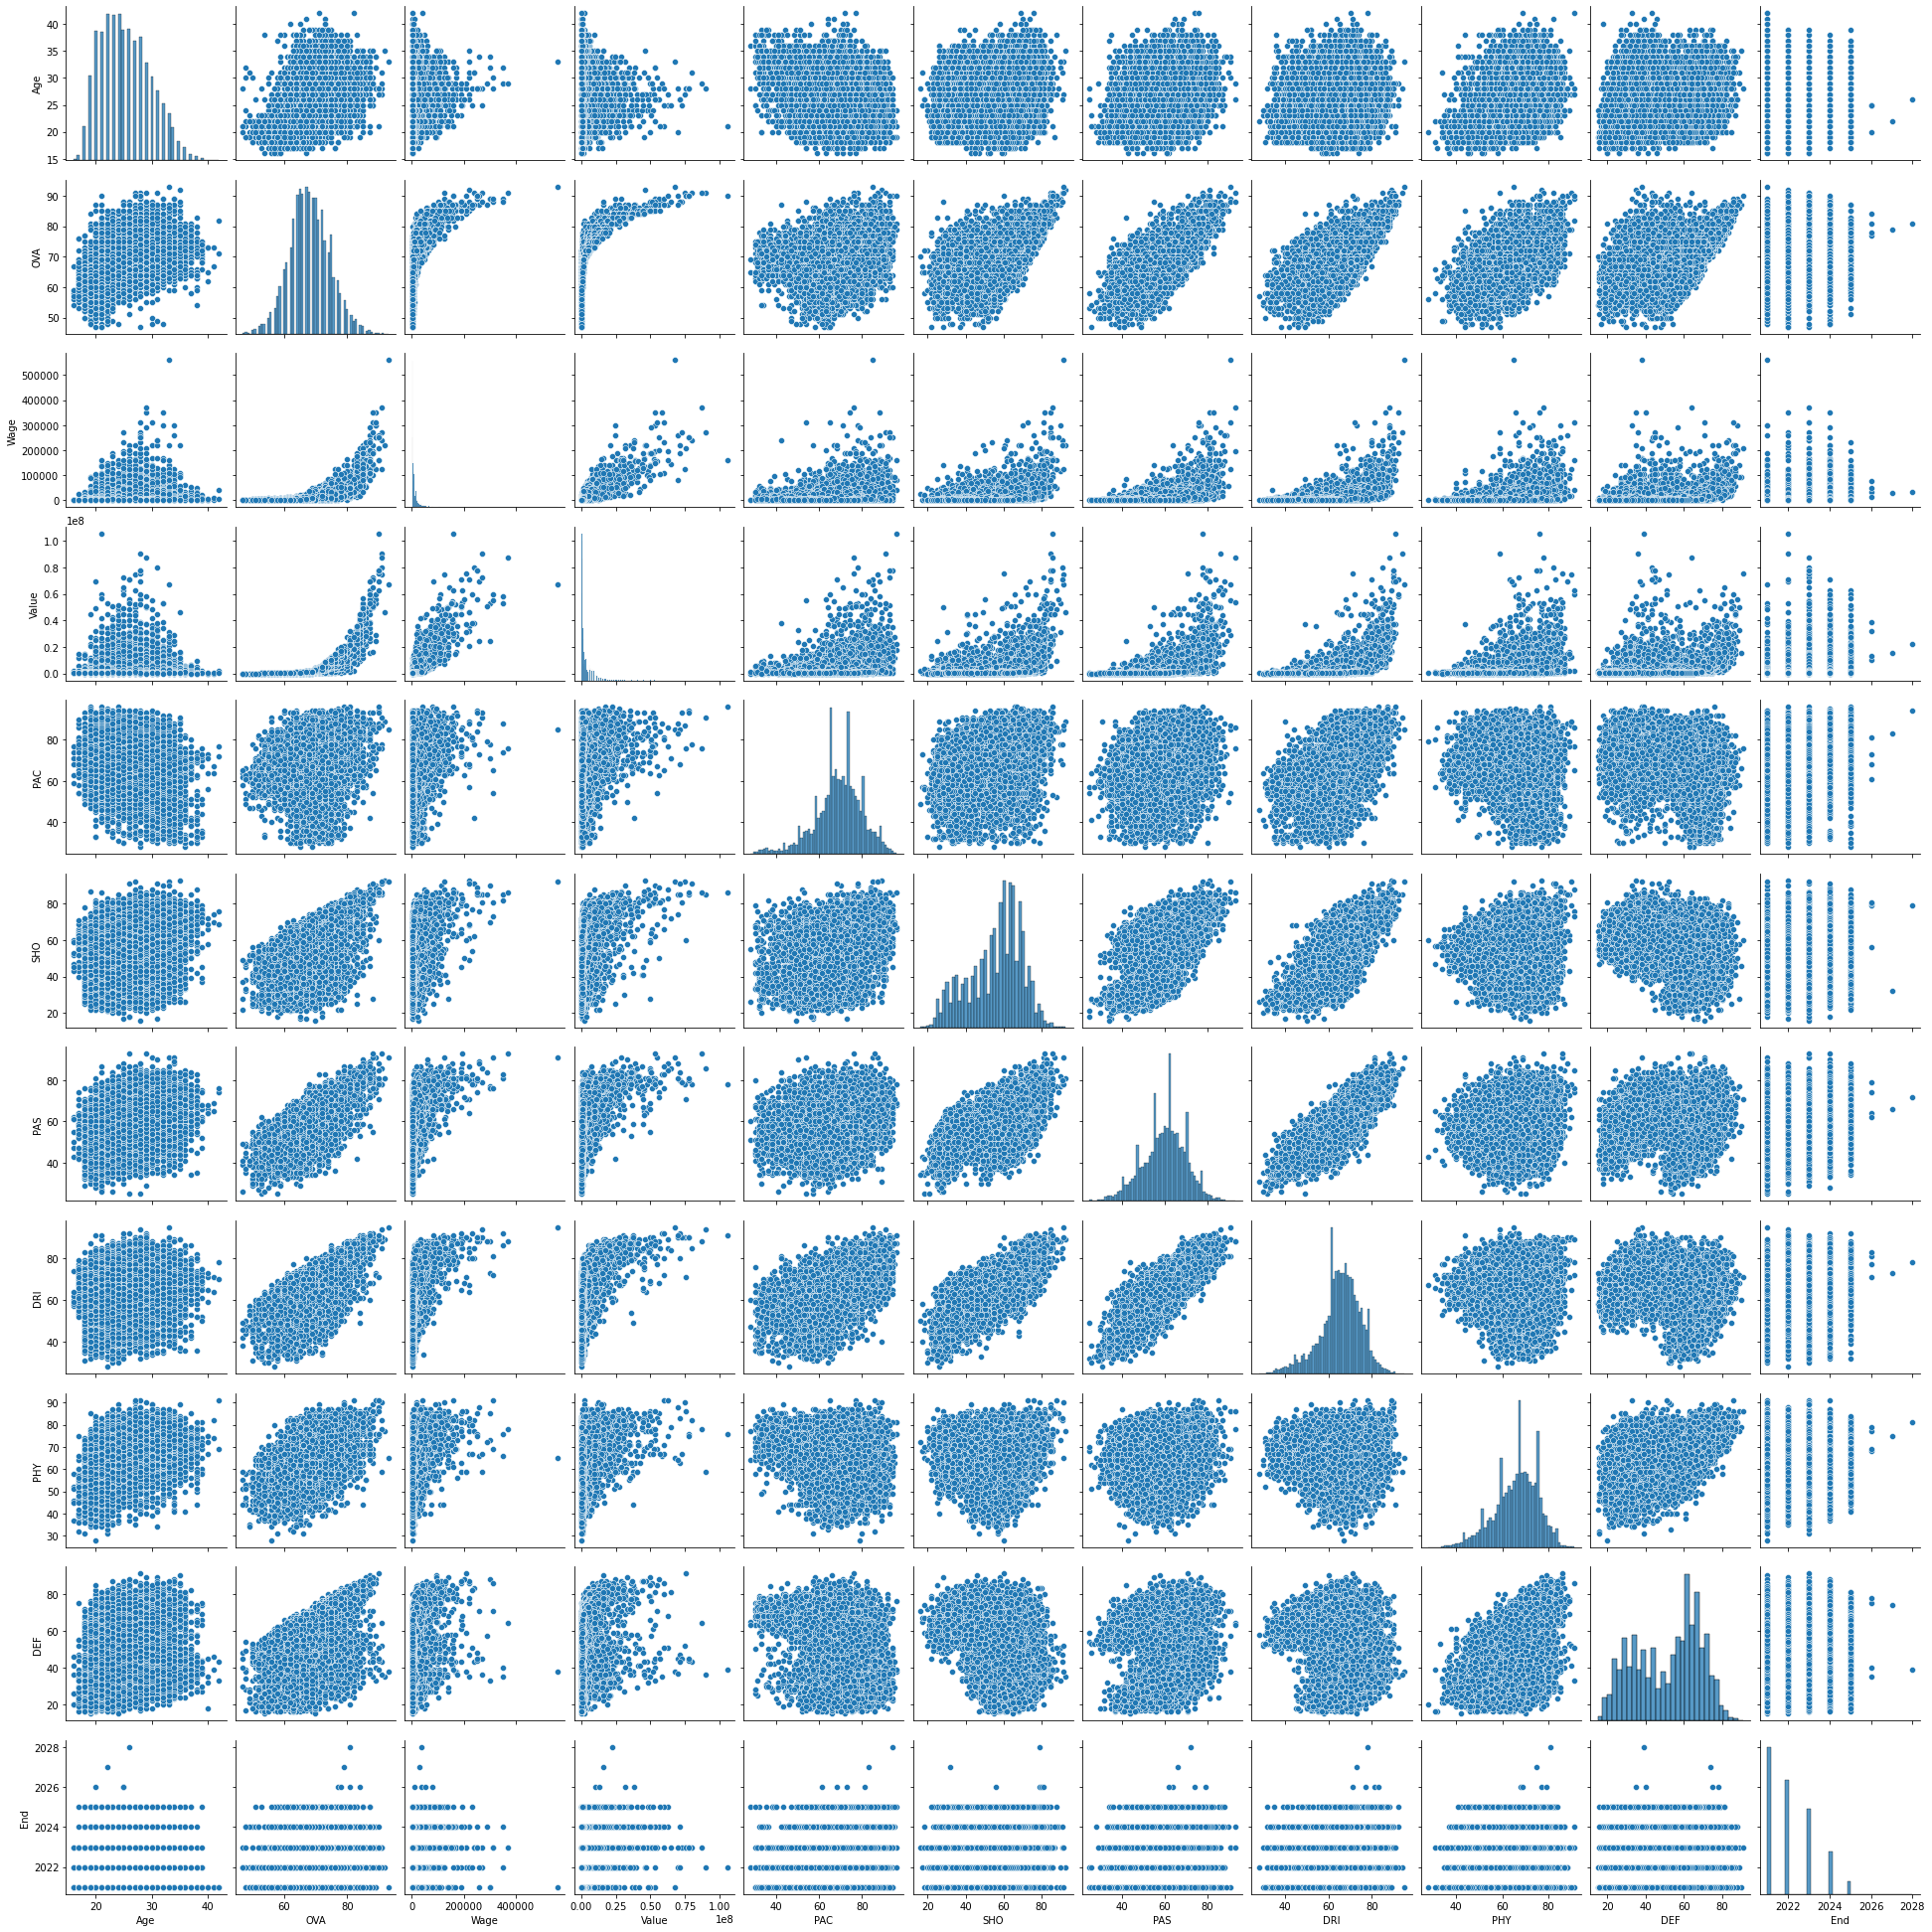

In [27]:
sns.pairplot(active_players)

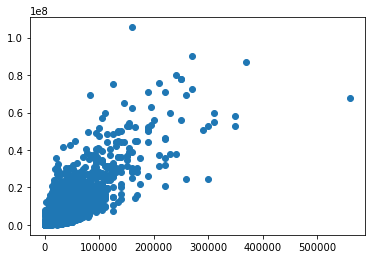

In [28]:
plt.scatter(x=active_players['Wage'], y=active_players['Value']) #you can remove 'x' and 'y' cuz the programms understands it itself
plt.show()

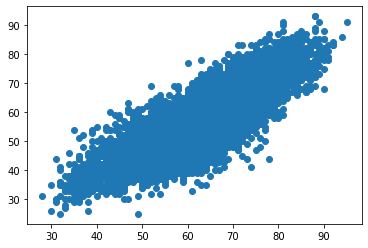

In [29]:
plt.scatter(x=active_players['DRI'], y=active_players['PAS']) #you can remove 'x' and 'y' cuz the programms understands it itself
plt.show()

In [30]:
active_players['BP'].unique()

array(['CAM', 'CF', 'GK', 'CM', 'ST', 'CB', 'RM', 'LWB', 'LM', 'CDM',
       'LB', 'RB', 'RWB', 'LW', 'RW'], dtype=object)

In [92]:
#Depending on the position of the soccer player and its closeness to goal, his value increases
active_players['CP']=active_players['BP'].apply(lambda x: '1' if x=='ST' or x=='RW' or x=='CF' or x=='RW' or x=='LW'
                           else '0.75' if x == 'CM' or x=='CAM' or x=='RM' or x=='CDM'
                           else '0.5' if x == 'GK' or x=='RWB' or x=='LWB' or x=='CB' or x=='LM' or x== 'RM' or x=='RB' or x=='LB'
                           else x)
active_players

,Age,Club,OVA,Nationality,BP,Wage,Value,PAC,SHO,PAS,DRI,PHY,DEF,End,CP
Name,,,,,,,,,,,,,,,
Iniesta,36,Vissel Kobe,81,Spain,CAM,12000.0,5500000.0,58,70,85,85,59,63,2021.0,0.75
R. Keane,35,LA Galaxy,80,Republic of Ireland,CF,10000.0,5500000.0,68,82,75,82,69,31,2022.0,1
G. Buffon,42,Juventus,82,Italy,GK,41000.0,2200000.0,77,76,74,78,91,33,2021.0,0.5
M. Stekelenburg,37,Ajax,72,Netherlands,GK,5000.0,325000.0,69,71,72,70,73,33,2021.0,0.5
Tarantini,36,Rio Ave FC,72,Portugal,CM,6000.0,975000.0,50,67,71,70,67,70,2021.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F. Tapia,19,Club América,60,Mexico,GK,2000.0,300000.0,60,61,60,65,59,24,2022.0,0.5
W. Rickard,18,Burnley,56,Wales,CAM,3000.0,130000.0,62,46,57,56,55,43,2021.0,0.75
C. Barrett,18,Burnley,56,England,RB,2000.0,130000.0,63,35,44,52,55,54,2022.0,0.5


In [91]:
best_players = active_players.sort_values(['OVA'],ascending=[False]).head(100)

selected = best_players
selected=selected.head(20)
selected

,Age,Club,OVA,Nationality,BP,Wage,Value,PAC,SHO,PAS,DRI,PHY,DEF,End
Name,,,,,,,,,,,,,,
L. Messi,33,FC Barcelona,93,Argentina,RW,560000.0,67500000.0,85,92,91,95,65,38,2021.0
Cristiano Ronaldo,35,Juventus,92,Portugal,ST,220000.0,46000000.0,89,93,81,89,77,35,2022.0
K. De Bruyne,29,Manchester City,91,Belgium,CAM,370000.0,87000000.0,76,86,93,88,78,64,2023.0
R. Lewandowski,31,FC Bayern München,91,Poland,ST,240000.0,80000000.0,78,91,78,85,82,43,2023.0
Neymar Jr,28,Paris Saint-Germain,91,Brazil,LW,270000.0,90000000.0,91,85,86,94,59,36,2022.0
J. Oblak,27,Atlético Madrid,91,Slovenia,GK,125000.0,75000000.0,87,92,78,90,90,52,2023.0
V. van Dijk,28,Liverpool,90,Netherlands,CB,210000.0,75500000.0,76,60,71,71,86,91,2023.0
K. Mbappé,21,Paris Saint-Germain,90,France,ST,160000.0,105500000.0,96,86,78,91,76,39,2022.0
Alisson,27,Liverpool,90,Brazil,GK,160000.0,62500000.0,86,88,85,89,91,51,2024.0


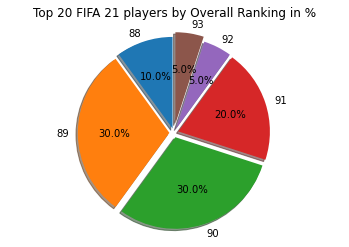

In [93]:
best_OVA = selected.groupby('OVA').count()
sizes = selected['OVA'].value_counts()
sizes = sizes.loc[best_OVA.index.values.tolist()]
labels = sizes.index.values.tolist()
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Top 20 FIFA 21 players by Overall Ranking in %");
plt.show()

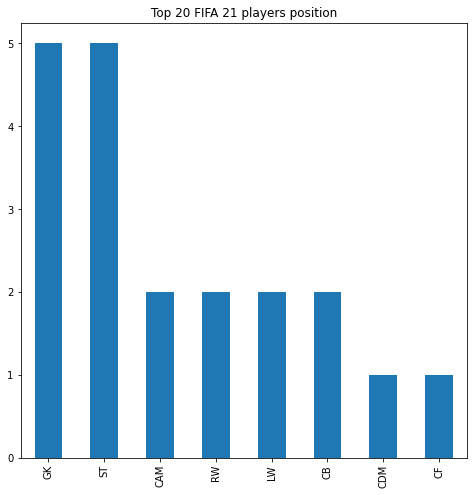

In [114]:
selected['BP'].value_counts().plot(kind='bar', figsize=(8,8))
plt.title("Top 20 FIFA 21 players position");

In [119]:
forward_players=(active_players['PAC']>=70)&(active_players['SHO']>=70)&(active_players['PAS']>=70)&(active_players['DRI']>=70)&(active_players['PHY']>=70)
best_forward_players=active_players[forward_players]
best_forward_players=best_forward_players.sort_values('PAC', ascending = False).head(100)
best_forward_players.head(20)

KeyError: 'SHO'

There are 35 different Nationalities among the active players!


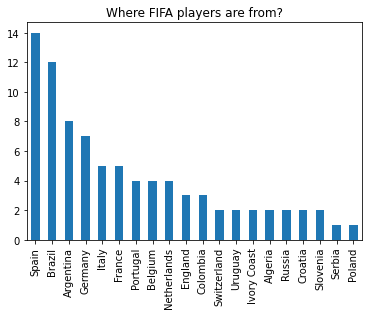

In [113]:
nationality_vals = best_forward_players['Nationality'].value_counts() #Provide a pandas series of the counts for each Nationality status

print('There are {} different Nationalities among the best stikers!'.format(nationality_vals.count()))

# The below should be a bar chart of the 10 largest population in the Top Players Nationality category 

(nationality_vals.nlargest(20)).plot(kind="bar");
plt.title("Where FIFA players are from?");

In [97]:
active_players.dtypes

Age              int64
Club            object
OVA              int64
Nationality     object
BP              object
Wage           float64
Value          float64
PAC              int64
SHO              int64
PAS              int64
DRI              int64
PHY              int64
DEF              int64
End            float64
CP              object
dtype: object

In [98]:
active_players['CP']=pd.to_numeric(active_players['CP'])

In [99]:
active_players['Transfer_value']=active_players['CP']*active_players['Value']
active_players

,Age,Club,OVA,Nationality,BP,Wage,Value,PAC,SHO,PAS,DRI,PHY,DEF,End,CP,Transfer_value
Name,,,,,,,,,,,,,,,,
Iniesta,36,Vissel Kobe,81,Spain,CAM,12000.0,5500000.0,58,70,85,85,59,63,2021.0,0.75,4125000.0
R. Keane,35,LA Galaxy,80,Republic of Ireland,CF,10000.0,5500000.0,68,82,75,82,69,31,2022.0,1.00,5500000.0
G. Buffon,42,Juventus,82,Italy,GK,41000.0,2200000.0,77,76,74,78,91,33,2021.0,0.50,1100000.0
M. Stekelenburg,37,Ajax,72,Netherlands,GK,5000.0,325000.0,69,71,72,70,73,33,2021.0,0.50,162500.0
Tarantini,36,Rio Ave FC,72,Portugal,CM,6000.0,975000.0,50,67,71,70,67,70,2021.0,0.75,731250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F. Tapia,19,Club América,60,Mexico,GK,2000.0,300000.0,60,61,60,65,59,24,2022.0,0.50,150000.0
W. Rickard,18,Burnley,56,Wales,CAM,3000.0,130000.0,62,46,57,56,55,43,2021.0,0.75,97500.0
C. Barrett,18,Burnley,56,England,RB,2000.0,130000.0,63,35,44,52,55,54,2022.0,0.50,65000.0


In [101]:
active_players.drop(columns=['Club', 'Nationality', 'End', 'Value', 'SHO', 'PAS', 'CP'], inplace=True)
active_players

,Age,OVA,BP,Wage,PAC,DRI,PHY,DEF,Transfer_value
Name,,,,,,,,,
Iniesta,36,81,CAM,12000.0,58,85,59,63,4125000.0
R. Keane,35,80,CF,10000.0,68,82,69,31,5500000.0
G. Buffon,42,82,GK,41000.0,77,78,91,33,1100000.0
M. Stekelenburg,37,72,GK,5000.0,69,70,73,33,162500.0
Tarantini,36,72,CM,6000.0,50,70,67,70,731250.0
...,...,...,...,...,...,...,...,...,...
F. Tapia,19,60,GK,2000.0,60,65,59,24,150000.0
W. Rickard,18,56,CAM,3000.0,62,56,55,43,97500.0
C. Barrett,18,56,RB,2000.0,63,52,55,54,65000.0


In [ ]:
#def boxcox_transform(active_players):
#    numeric_cols = active_players.select_dtypes(np.number).columns
#    _ci = {column: None for column in numeric_cols}
#    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
#        active_players[column] = np.where(active_players[column]<=0, np.NAN, active_players[column]) 
#        active_players[column] = active_players[column].fillna(active_players[column].mean())
#        transformed_data, ci = stats.boxcox(active_players[column])
#        active_players[column] = transformed_data
#        _ci[column] = ci 
#    return active_players, _ci

In [41]:
#active_players, _ci = boxcox_transform(active_players)
#_ci

In [102]:
y = active_players['OVA']
X = active_players.drop(['OVA'], axis=1)

nums=X.select_dtypes(include=np.number)
cats=X.select_dtypes(include=np.object)


In [103]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(cats)

OneHotEncoder(drop='first')

In [104]:
encoded = encoder.transform(cats).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [105]:
X = np.concatenate((nums, encoded), axis=1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#random_state you choose the number. So every time you run the cell, you have the same result
X

array([[3.6e+01, 1.2e+04, 5.8e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [3.5e+01, 1.0e+04, 6.8e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [4.2e+01, 4.1e+04, 7.7e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [1.8e+01, 2.0e+03, 6.3e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.0e+01, 3.0e+03, 7.1e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.8e+01, 2.0e+03, 7.0e+01, ..., 0.0e+00, 0.0e+00, 1.0e+00]])

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
predictions = model.predict(X_test)
predictions

array([71.88994044, 79.75291357, 65.56133599, ..., 73.01466817,
       66.60807892, 60.68330835])

In [109]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8249133017537658, 2.046202664858381, 2.6730347062407875)

In [110]:
#from scipy.special import inv_boxcox

#predictions = inv_boxcox(predictions, _ci['OVA'])
#predictions

In [112]:
results=pd.DataFrame()
results['True'] = y_test
results['Predictions'] = predictions
results['Residual'] = results.apply(lambda x: abs(x['True'] - x['Predictions']), axis=1)
results

,True,Predictions,Residual
Name,,,
Enaldo Praz,75,71.889940,3.110060
M. Hamšík,81,79.752914,1.247086
Yang Liyu,66,65.561336,0.438664
J. Gaari,65,67.217984,2.217984
P. De la Vega,71,68.933845,2.066155
...,...,...,...
A. Meret,78,76.611195,1.388805
Apa,67,65.000059,1.999941
F. Onyeka,74,73.014668,0.985332
